# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_csv('TSNE_Subject_1.csv')
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
172516,0.482665,0.376538,15.521961,0,0
47990,49.075886,-20.357862,-6.331365,0,0
288321,3.242482,13.710695,-33.712505,42,42
246085,-4.927454,-5.921353,-26.156322,37,37
18124,52.946396,-7.968584,4.560220,0,0


In [3]:
raw_data.shape

(378535, 5)

In [4]:
raw_data.columns

Index(['TSNE Element 1', 'TSNE Element 2', 'TSNE Element 3', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378535 entries, 0 to 378534
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  378535 non-null  float64
 1   TSNE Element 2  378535 non-null  float64
 2   TSNE Element 3  378535 non-null  float64
 3   stimulus        378535 non-null  int64  
 4   restimulus      378535 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 14.4 MB


In [6]:
raw_data.describe(include='all')

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
count,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000
mean,0.040247,1.662873,-1.765831,13.268231,13.268231
std,22.350302,22.460744,23.430280,17.514047,17.514047
min,-55.200640,-56.550953,-54.991833,0.000000,0.000000
25%,-16.302482,-14.717854,-19.790751,0.000000,0.000000
50%,-0.260713,1.906979,-1.771864,0.000000,0.000000
75%,16.617624,18.426006,15.924356,28.000000,28.000000
max,58.190353,57.606556,58.211906,52.000000,52.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199821
52      4519
50      4492
51      4487
35      4295
43      4239
40      4211
29      4196
45      4095
39      4036
47      4013
5       3952
46      3905
41      3872
48      3836
49      3831
34      3775
1       3738
31      3725
32      3724
33      3717
3       3706
24      3604
42      3584
18      3583
30      3558
21      3502
28      3391
13      3358
44      3303
38      3256
37      3232
36      3214
14      3168
15      3130
12      3125
19      3079
25      3064
6       3058
10      3038
22      3012
4       2982
16      2966
8       2909
20      2858
23      2764
27      2656
2       2618
7       2615
9       2608
17      2537
11      2491
26      2087
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

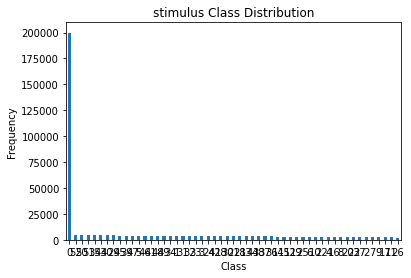

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
raw_data.sample(5)

,TSNE Element 1,TSNE Element 2,TSNE Element 3,stimulus,restimulus
13582,34.140583,-31.668154,-12.723445,0,0
344455,11.209769,-2.027688,-13.527973,0,0
89711,-3.332742,11.658963,29.839708,15,15
226569,-8.002022,-25.646746,23.080967,0,0
226753,-20.941630,-25.097322,-3.384782,0,0


In [11]:
raw_data.shape

(378535, 5)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378535 entries, 0 to 378534
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TSNE Element 1  378535 non-null  float64
 1   TSNE Element 2  378535 non-null  float64
 2   TSNE Element 3  378535 non-null  float64
 3   stimulus        378535 non-null  int64  
 4   restimulus      378535 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 14.4 MB


In [13]:
print(raw_data.isnull().any())

TSNE Element 1    False
TSNE Element 2    False
TSNE Element 3    False
stimulus          False
restimulus        False
dtype: bool


In [14]:
X = raw_data.iloc[:,0:3]
y = raw_data.stimulus

# Hyperparameter Tuning -- Decision Tree

https://www.section.io/engineering-education/hyperparmeter-tuning/
    
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [26]:
from sklearn import tree
tuned_tree = tree.DecisionTreeClassifier()

## Current Parameters 

In [27]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(tuned_tree.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


## GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [49]:
param_grid = {'ccp_alpha': [0.0],
              'class_weight': [None],
              'criterion': ['gini'],
              'max_depth': [None],
              'max_features': [None],
              'max_leaf_nodes': [None],
              'min_impurity_decrease': [0.0],
              'min_samples_leaf': [1],
              'min_samples_split': [2],
              'min_weight_fraction_leaf': [0.0],
              'random_state': [None],
              'splitter': ['best']}

In [50]:
grid_search = GridSearchCV(estimator = tuned_tree, param_grid = param_grid, 
                          cv = 3)

In [51]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0], 'class_weight': [None],
                         'criterion': ['gini'], 'max_depth': [None],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None],
                         'splitter': ['best', 'random']})

In [52]:
print(grid_search.best_params_)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


# Splitting Data for Training and Testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 39)

# Decision Tree

In [16]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
y_pred1 = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 86.72531304485656


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     20040
           1       0.77      0.74      0.76       402
           2       0.78      0.76      0.77       254
           3       0.70      0.73      0.72       368
           4       0.86      0.87      0.86       285
           5       0.79      0.79      0.79       381
           6       0.77      0.69      0.73       326
           7       0.79      0.83      0.81       250
           8       0.73      0.71      0.72       296
           9       0.73      0.69      0.71       274
          10       0.69      0.67      0.68       321
          11       0.64      0.64      0.64       257
          12       0.36      0.34      0.35       310
          13       0.75      0.75      0.75       324
          14       0.72      0.68      0.70       332
          15       0.71      0.82      0.76       285
          16       0.64      0.64      0.64       306
 

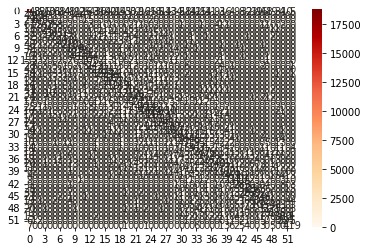

In [19]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [20]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.8251968087916732
MSE: 46.78599355418186
RMSE: 6.840028768520046


In [21]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8671497370356182
Recall Score :  0.8672531304485656
f1_score :  0.8670589671503187
